<a href="https://colab.research.google.com/github/PhilChenn/Computer-Vision/blob/main/homework01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 1

Annie Wang, Phil Chen, Kai He

### Problem 0 (3 points)

## Part 1: Correlation and Convolution Basics

### Problem 1.1 (Exam Style)

$\text{corr}(I, H, \text{'valid'}) =
\begin{bmatrix}
0 & 13 & 1 \\
-2 & 12 & -3 \\
4 & 4 & -4
\end{bmatrix}
$ \\
$\text{conv}(I, H, \text{'valid'}) =
\begin{bmatrix}
4 & 5 & 10 \\
-3 & 14 & -7 \\
1 & 4 & -3
\end{bmatrix}
$ \\
$\text{conv}(I, K, \text{'valid'}) =
\begin{bmatrix}
2 & -2 & -3 \\
-1 & 2 & 1 \\
0 & 0 & 0 \\
-2 & 3 & -1
\end{bmatrix}
$ \\
$\text{conv}(J, H, \text{'full'}) =
\begin{bmatrix}
8 & 0 & 4 & 0\\
6 & -14 & 13 & -5 \\
1 & -6 & 8 & -15
\end{bmatrix}
$ \\
$\text{corr}(J, H, \text{'same'}) =
\begin{bmatrix}
-16 & 14 \\
-5 & 2\\
\end{bmatrix}
$

### Problem 1.2 (Exam Style)

For a matrix $H$ to be separable, it should be the outer product of two vectors. For example, if $H[r,c] = x[r] y[c]$ we have $$ H = x y^T$$

We can prove that $H = \mathbf{v} \mathbf{w}^T \Rightarrow \text{rank} H = 1$ by multiplying both sides with a vector $\mathbf{u} \in \mathbb{R}^m$. $$H \mathbf{u} = \mathbf{v}  \mathbf{w}^T \mathbf{u} = (\mathbf{u} \cdot \mathbf{w})\mathbf{v}$$ 

We see that $H$ maps every vector in $\mathbb{R}^m$ to a scalar multiple of $\mathbf{v}$ , thus, $\text{rank}(H) = 1$.

To obtain values of $a, b, c, d$ in $H$, we simply do scalar multiplication of the first row, hence, 

\begin{equation*}
H = 
\begin{bmatrix}
1 & -1 & 2 \\
-3 & 3 & -6 \\
0 & 0 & 0
\end{bmatrix}
\end{equation*}

That is to say, \\
\begin{equation*}
a = -3\\
b = -6\\
c = 0\\
d = 0
\end{equation*}


### Problem 1.3 (Exam Style)

$D(x, y) = xe^{x^2+y}$ can be separated into $f(x) = xe^{x^2},\ell(y) = e^{y}$

$L(x, y) = (x^2 + y^2)e^{x^2+y^2}$ is not separable.

$U(x, y) = 1$ can be separated into $f(x) = k, \ell(y) = \frac{1}{k}$, where $k$ is a nonzero constant.

## Part 2: Implementing Convolution

In [ ]:
import numpy as np
import scipy.signal as ss
from time import perf_counter as stopwatch


def add_timer(f):
    def wrapper(*args, **kwargs):
        tic = stopwatch()
        ret = f(*args, **kwargs)
        t = stopwatch() - tic
        return ret, t

    return wrapper


@add_timer
def convolution(f, h, mode='valid'):
    assert f.ndim == h.ndim, 'inputs must have the same number of dimensions'
    g = ss.convolve(f, h, mode=mode, method='direct')
    return g.astype(f.dtype)



In [ ]:
from urllib.request import urlretrieve as retrieve
from os import path as osp
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline


def show_image(img, name=None):
    plt.imshow(img, cmap='gray')
    if name is not None:
        plt.title(name)
    plt.axis('off')
    

local_file_name = 'breakfast.png'
if not osp.exists(local_file_name):
    image_url = 'https://www2.cs.duke.edu/courses/spring21/' +\
                'compsci527/homework/1/breakfast.png'
    retrieve(image_url, local_file_name)
image = np.array(Image.open(local_file_name))

The convolution took 1.019 seconds to compute


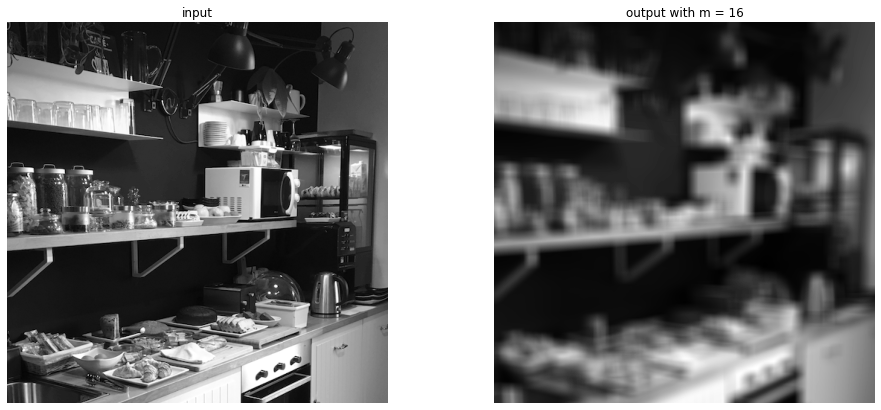

In [ ]:
m = n = 16
box = np.ones((m, n), dtype=float) / (m * n)
smooth, process_time = convolution(image, box)
print('The convolution took {:.3f} seconds to compute'.format(process_time))


plt.figure(figsize=(16, 7))
for plot, (img, name) in enumerate(((image, 'input'),
                                    (smooth, 'output with m = {}'.format(m)))): 
    plt.subplot(1, 2, plot + 1)
    show_image(img, name)
plt.show()

In [ ]:
def largest_difference(i, j):
    return np.amax(np.abs(i.astype(int) - j.astype(int)))

### Problem 2.1

In [ ]:
@add_timer
def python_convolution(f, h):
    assert f.ndim == 2, 'input array must be two-dimensional'
    assert h.ndim == 2, 'kernel must be two-dimensional'
    t = np.flip(h)
    m, n = f.shape
    k, l = h.shape
    J = np.zeros((m-k+1, n-l+1))
    for row in range(m-k+1):
        for col in range(n-l+1):
            for i in range(k):
                for j in range(l):
                    J[row][col] += t[i][j] * f[row+i][col+j]
    
    return J.astype(f.dtype)

kernal = np.array([[2, 0, 1],
                   [1, -1, 3]])

smooth_lib, time_lib = convolution(image, kernal)
smooth_py, time_py = python_convolution(image, kernal)
diff = largest_difference(smooth_py, smooth_lib)
print('Python time {py:.3f}s, scipy time {sci:.3f}s, ratio = {r:.3f}, maximum output difference {d}'.format(py = time_py, sci = time_lib, r = time_py/time_lib, d = diff))



Python time 2.685s, scipy time 0.052s, ratio = 51.434, maximum output difference 0


### Problem 2.2

2 x 2 kernel run times: square kernel 0.025 s, separable kernel 0.034 s; maximum output difference 0

4 x 4 kernel run times: square kernel 0.074 s, separable kernel 0.048 s; maximum output difference 0

8 x 8 kernel run times: square kernel 0.302 s, separable kernel 0.088 s; maximum output difference 0

16 x 16 kernel run times: square kernel 1.001 s, separable kernel 0.147 s; maximum output difference 0

32 x 32 kernel run times: square kernel 3.627 s, separable kernel 0.268 s; maximum output difference 0

64 x 64 kernel run times: square kernel 12.260 s, separable kernel 0.462 s; maximum output difference 0



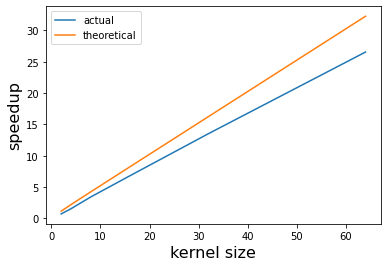

In [ ]:
@add_timer
def separable_convolution(f, h, mode='valid'):
  mid = ss.convolve(f, h[0], mode=mode, method='direct')
  result = ss.convolve(mid, h[1], mode=mode, method='direct')
  return result.astype(f.dtype)

kernel_sizes = [2, 4, 8, 16, 32, 64]
speedups = []
theoretical_speedups = []
for m in kernel_sizes:
    n = m
    box = np.ones((m, n), dtype=float) / (m * n)

    kern_u = np.ones((m, 1), dtype=float) / (m)
    kern_v = np.ones((1, n), dtype=float) / (n)
    kernel = (kern_u, kern_v)
    separable_smooth, separable_time = separable_convolution(image, kernel)
    convolution_smooth, convolution_time = convolution(image, box)
    diff = largest_difference(separable_smooth, convolution_smooth)

    speedup = convolution_time / separable_time
    speedups.append(speedup)
    theoretical_speedups.append((2*m**2 - 1)/(4*m - 2))

    print('{} x {} kernel run times: square kernel {:.3f} s, separable kernel {:.3f} s; maximum output difference {}'.format(m, m, convolution_time, separable_time, diff))
    print()

plt.plot(kernel_sizes, speedups, label = "actual")
plt.plot(kernel_sizes, theoretical_speedups, label = "theoretical")
plt.xlabel('kernel size', fontsize = 16)
plt.ylabel('speedup', fontsize = 16)
plt.legend(fontsize=16)
plt.show()

The discrepancy in actual vs. theoretical speedup time is because the theoretical speedup time does not take into account other computational and hardware tasks and requirements besides multiplication and addition. These costs make the actual speedup slightly lower than the theoretical speedup.

### Problem 2.3

In [ ]:
# Problem 2.3
import skimage.transform.integral as integral

def integral_image(f):
    return np.pad(integral.integral_image(f), ((1, 0), (1, 0)))

@add_timer
def box_convolution(f, size):
    F = integral_image(f)
    m = size[0]
    n = size[1]
    set_F_s = F[m:, n:]
    set_F_p = F[:-m, :-n]
    set_F_q = F[:-m, n:]
    set_F_r = F[m:, :-n]

    S = (set_F_s - set_F_q - set_F_r + set_F_p) / (m*n)
    return S.astype(f.dtype)

box_m = 32
box_n = 64
box = np.ones((box_m, box_n), dtype=float) / (box_m * box_n)
box_smooth, box_process_time = box_convolution(image, (box_m, box_n))
conv_smooth, conv_process_time = convolution(image, box)

kern_u = np.ones((box_m, 1), dtype=float) / (box_m)
kern_v = np.ones((1, box_n), dtype=float) / (box_n)
kernel = (kern_u, kern_v)
separable_smooth, separable_process_time = separable_convolution(image, kernel)

print('convolution time {:.3f} s, separable_convolution time {:.3f} s, box_convolution time {:.3f} s\n'.format(conv_process_time, separable_process_time, box_process_time))

print('convolution/separable_convolution = {:.3f}, convolution/box_convolution = {:.3f}, separable_convolution/box_convolution = {:.3f}\n'.format((conv_process_time/separable_process_time), (conv_process_time/box_process_time), (separable_process_time/box_process_time)))

print('largest difference for convolution vs separable_convolution = {}, largest difference for convolution vs box_convolution = {}\n'.format(largest_difference(conv_smooth, separable_smooth), largest_difference(conv_smooth, box_smooth)))


convolution time 6.646 s, separable_convolution time 0.349 s, box_convolution time 0.009 s

convolution/separable_convolution = 19.026, convolution/box_convolution = 748.215, separable_convolution/box_convolution = 39.325

largest difference for convolution vs separable_convolution = 0, largest difference for convolution vs box_convolution = 0



### Problem 2.4

In addition to the 3 additions to compute $F$, we also need to perform 3 additions per pixel to compute $S$. Lastly, we need to perform one division per pixel, so our total operation count is 7.

box_convolution is different from convolution and separable_convolution because box_convolution relies mostly on addition, while convolution and separable_convolution still require expensive multiplications. This is especially vital as image and kernel grows in size. Computational cost for box convolution is much cheaper and stays at a constant, regardless of the kernel size.